# Hidden Markov Models - TP6 AAA
##### Duarte Balata (46304) Miguel Oliveira (55772)


Importing the necessary packages

In [1]:
import numpy as np
from hmmlearn import hmm

# Exercise 1
Below we will follow the tutorial as per https://hmmlearn.readthedocs.io/en/latest/tutorial.html

In [2]:
import numpy as np
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
lr = hmm.GaussianHMM(n_components=3, covariance_type="diag",
                     init_params="cm", params="cmt")
lr.startprob_ = np.array([1.0, 0.0, 0.0])
lr.transmat_ = np.array([[0.5, 0.5, 0.0],
                         [0.0, 0.5, 0.5],
                         [0.0, 0.0, 1.0]])

In [4]:
model = hmm.GaussianHMM(n_components=3, n_iter=100, init_params="mcs")
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

In [5]:
#Sampling from HMM

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

Automatically created module for IPython interactive environment


In [6]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

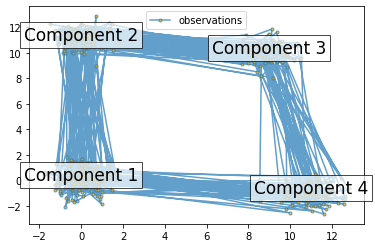

In [7]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

The diagram above illustrates the transition between components. As the transition matrix of the example showed, we can also see visually that there not transitions between components 1 and 3.

We will continue the tutorial below, remodelling and changing the covariance type and also fitting the model again to predict the new inferred optimal hidden states.

In [8]:
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
remodel.fit(X)

GaussianHMM(covariance_type='full', n_components=3, n_iter=100)

The following commands allow us to verify if the model as reach its point of convergence.

In [9]:
print(remodel.monitor_)
print(remodel.monitor_.converged)

ConvergenceMonitor(
    history=[-3124.6862426926978, -2747.7317503535664, -2118.40207666888, -1858.279185361295, -1847.7529122861245, -1847.7529122861347],
    iter=6,
    n_iter=100,
    tol=0.01,
    verbose=False,
)
True


The predict command allows us to get the predicted sequence of hidden states that likely originated a given sequence of observed results.

In [10]:
Z2 = remodel.predict(X)
Z2

array([1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
#Two 1D Sequences

X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]
X2 = [[2.4], [4.2], [0.5], [-0.24]]

In [12]:
#To pass both sequences to fit() or predict(), first concatenate them into a single array and then compute an array of sequence lengths:

X = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
lengths

[5, 4]

In [13]:
#GaussianHMM with X observation and lenghts

hmm.GaussianHMM(n_components=3).fit(X, lengths)

Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.


GaussianHMM(n_components=3)

In [14]:
#Saving and loading HMM

import pickle
with open("filename.pkl", "wb") as file: pickle.dump(remodel, file)
with open("filename.pkl", "rb") as file: pickle.load(file)

# Exercise 2 - Dishonest Casino

Below we will begin by designing the machine with 2 hidden states accounting for two dices thrown at a casino. The hidden states are:
* Fair (F)
* Loaded (L)

We will define the sample with rolls_str as the sequence of symbols of the hidden states and the results of the dice thrown. In addition, dice_str will account for the sequence of dice thrown for every symbol. Based on the sample, we define a starting probability for which die has been thrown. For the starting probability of a Loaded dice being thrown,*p_L*, we use the probability of throwing a Loaded die after throwing a Fair die, divided by the sum of the latter probabilit and the probability of throwing consecutively a Loaded die. To define the starting probability of a Fair die being thrown, *p_F*, we divide instead the probability of throwing a Fair die after throwing a Loaded one by the same sum.

The hidden model is defined also by the transition matrix as *transmat*. This defines the probability of:
* Throwing a Fair die if the previous throw was also a Fair die (95%)
* Throwing a Loaded die if the previous throw was as a Fair die (5%)
* Throwing a Loaded die if the previous throw was also a Loaded die (90%)
* Throwing a Loaded die if the previous throw was a Fair die (10%)

Finally, we define the probability for getting each face of the die (1 to 6) for both the Fair and Loaded dice. This is done via the emission probability defined below as *emissionprob*. It is important to note that the Fair die will have an equal probabability for each face of the die 1/6 while the Loaded die has an unequal probability as faces 1 to 5 have a probability of 1/10 and face 6 has a probability of 5/10.

We can see by the sample provided that the number 6 is far more frequent when a Loaded die is thrown.

We start the exercise by storing all the know information into python variables.

In [15]:
from sklearn import preprocessing

rolls_str = "664153216162115234653214356634261655234232315142464156663246"

states = ["F","L"]

X = np.array([int(nr) for nr in rolls_str])

p_L = 0.1/(0.05+0.1)
p_F = 0.05/(0.05+0.1)

startprob = np.array([p_L, p_F])
transmat = np.array([[0.95, 0.05], [0.9, 0.1]])
emissionprob = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                        [1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])

le = preprocessing.LabelEncoder()
le.fit(X)
X = le.transform(X).reshape(-1, 1)

#### a) construct the model assuming all parameters known.

We then build the model assuming that all parameters are known and generate the most likely hidden state sequence for the given parameters.

In [16]:
# init_params: "s"-start_prob; "t"-transmat; "e"-emission_prob
model = hmm.MultinomialHMM(n_components=2, init_params="", params="", n_iter=1000)

model.startprob_ = startprob

model.transmat_ = transmat

model.emissionprob_ = emissionprob

score_a, Z_a = model.decode(X)

X_str = "".join([str(nr) for nr in X]).replace("[","").replace("]","")
Z_a = "".join(map(lambda x: states[x], [int(nr) for nr in Z_a]))

print("Rolls:", X_str)
print("DiceA:", Z_a, "    Score:", score_a)

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceA: LFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF     Score: -110.58593974381895


Then, for the next trials, we try to estimate one or more of the model's parameters. In order to account for the random factor of the model's parameter estimation, in each trial we perform a 5 attempt iteration and store only the results of the one which generated the most likely hidden state sequence.

After each trial we present the most likely hidden state sequence according to the given and estimated parameters, as well as the matrices of the estimated parameters.

When starting the MultinomialHMM model, we have to pass two mandatory arguments (for our case study): 'init_params' and 'params'. 'init_params' is used to set the parameters that must be initialized by the algorithm and 'params' defines the parameters that shall be updated during the iterative learning process.

Since we have *a priori* knowledge of some our model's parameters, we don't want them to be randomly initiazed, nor updated. For this reason, we set both of these arguments exclusively for the parameters we are trying to estimate.

The interpretation of the results obtained for each trial's hidden state sequences are presented at the end of the notebook.

#### b) train the model assuming the transition probability matrix is unknown.

In [17]:
model = hmm.MultinomialHMM(n_components=2, init_params="t", params="t", n_iter=1000)

model.startprob_ = startprob

model.emissionprob_ = emissionprob

max_score = float('-inf')

for i in range(1):

    model.fit(X)
    
    score = model.score(X)
    
    if score > max_score:
        max_score_b = score
        Z_b = model.predict(X)
        pred_transmat = model.transmat_

Z_b = "".join(map(lambda x: states[x], [int(nr) for nr in Z_b]))

print("Predicted transition matrix:\n", pred_transmat, "\n")

print("Rolls:", X_str)
print("DiceB:", Z_b, "    Score:", max_score_b)

Predicted transition matrix:
 [[0.85999646 0.14000354]
 [0.6391755  0.3608245 ]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceB: LLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF     Score: -106.27197045899095


#### c) train the model assuming the emission probability matrix is unknown.

In [18]:
model = hmm.MultinomialHMM(n_components=2, init_params="e", params="e", n_iter=1000)

model.startprob_ = startprob

model.transmat_ = transmat

model.fit(X)

max_score = float('-inf')

for i in range(1):

    model.fit(X)
    
    score = model.score(X)
    
    if score > max_score:
        max_score_c = score
        Z_c = model.predict(X)
        pred_emissionprob = model.emissionprob_

Z_c = "".join(map(lambda x: states[x], [int(nr) for nr in Z_c]))
print("Predicted emission matrix:\n", pred_emissionprob, "\n")

print("Rolls:", X_str)
print("DiceC:", Z_c, "    Score:", max_score_c)

Predicted emission matrix:
 [[0.17741854 0.17783604 0.1604925  0.16033115 0.14248837 0.1814334 ]
 [0.01402884 0.00810197 0.00104442 0.00333499 0.00336487 0.97012491]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceC: LFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF     Score: -105.67117832957064


#### d) train the model assuming both transition and emission matrices are unkonwn.

In [19]:
model = hmm.MultinomialHMM(n_components=2, init_params="te", params="te", n_iter=1000)

model.startprob_ = startprob

max_score = float('-inf')

for i in range(1):

    model.fit(X)
    
    score = model.score(X)
    
    if score > max_score:
        max_score_d = score
        Z_d = model.predict(X)
        pred_transmat = model.transmat_
        pred_emissionprob = model.emissionprob_

print("Predicted transition matrix:\n", pred_transmat, "\n")
print("Predicted emission matrix:\n", pred_emissionprob, "\n")

Z_d = "".join(map(lambda x: states[x], [int(nr) for nr in Z_d]))

print("Rolls:", X_str)
print("DiceD:", Z_d,"    Score:", max_score_d)

Predicted transition matrix:
 [[0.54021521 0.45978479]
 [0.52300212 0.47699788]] 

Predicted emission matrix:
 [[0.13873182 0.12206695 0.12954903 0.22506941 0.0756115  0.30897129]
 [0.19903407 0.21834325 0.17369603 0.06301895 0.20021418 0.14569352]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceD: FFFLLLLLFLFLLLLLLFFLLLLFLLFFLFLFLFLLLLFLLLLLLLFLFFFLLFFFLLFF     Score: -106.37977516988438


#### e) train the model assuming all the parameters unknown, including the number of states (suggestion: try with the number of states from 1 to 4 and compare the results of the score function).

In this trial, we start by training the model with all parameters unknown assuming our typical number of states (2). As it is possible to tell, the predicted starting problabilities for the model are now very distant from the original ones, with the first state having a starting probabilty of around 1, instead of the previously set 2/3. This causes the hidden states to start from the Fair dice almost every time, which contrasts with our originally generated hidden state sequence.

In [20]:
model = hmm.MultinomialHMM(n_components=2, init_params="ste", params="ste", n_iter=1000)

max_score = float('-inf')

for i in range(1):

    model.fit(X)
    
    score = model.score(X)
    
    if score > max_score:
        max_score_e = score
        Z_e = model.predict(X)
        pred_startprob = model.startprob_
        pred_transmat = model.transmat_
        pred_emissionprob = model.emissionprob_
        
score_e, Z_e = model.decode(X)

print("Predicted starting probabilities matrix:\n", pred_startprob, "\n")
print("Predicted transition matrix:\n", pred_transmat, "\n")
print("Predicted emission matrix:\n", pred_emissionprob, "\n")

Z_e_str = "".join(map(lambda x: states[x], [int(nr) for nr in Z_e]))

print("Rolls:", X_str)
print("DiceE:", Z_e_str,"    Score:", max_score_e)

Predicted starting probabilities matrix:
 [1.00000000e+00 3.81413013e-35] 

Predicted transition matrix:
 [[0.63610366 0.36389634]
 [0.29074143 0.70925857]] 

Predicted emission matrix:
 [[2.24680501e-01 2.85554360e-03 3.97234582e-04 8.32380637e-02
  1.80668099e-01 5.08160558e-01]
 [1.18509325e-01 3.02646444e-01 2.74185405e-01 2.05419150e-01
  9.40406970e-02 5.19897900e-03]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceE: FFFFFLLFFFFLFFFLLLFFLLLLLFFFLLLFFFFFLLLLLLLFFFLLLFFFFFFFLLLF     Score: -104.03708687645575


We then try to train the model with a variable number of hidden states, without providing any *a priori* information.

As it is possible to see, the highest score is achieved when 4 hidden states are considered. This means that, without any information provided on the model's start, transition or emission probabilities, the observed sequence is more likely to occur when an higher number of states is considered, since there's an higher flexibility when estimating the parameters.

In [21]:
for n_states in range(1,5):
    print("Number of states:", n_states)

    model = hmm.MultinomialHMM(n_components=n_states, init_params="ste", params="ste", n_iter=1000)

    max_score = float('-inf')

    for i in range(1):

        model.fit(X)

        score = model.score(X)

        if score > max_score:
            max_score_e = score
            Z_e = model.predict(X)
            pred_startprob = model.startprob_
            pred_transmat = model.transmat_
            pred_emissionprob = model.emissionprob_

    print("Predicted starting probabilities matrix:\n", pred_startprob, "\n")
    print("Predicted transition matrix:\n", pred_transmat, "\n")
    print("Predicted emission matrix:\n", pred_emissionprob, "\n")

    Z_e = "".join([str(nr) for nr in Z_e])

    print("Rolls:", X_str)
    print("DiceE:", Z_e,"    Score:", max_score_e, "\n\n")

Number of states: 1
Predicted starting probabilities matrix:
 [1.] 

Predicted transition matrix:
 [[1.]] 

Predicted emission matrix:
 [[0.16666667 0.16666667 0.15       0.15       0.13333333 0.23333333]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceE: 000000000000000000000000000000000000000000000000000000000000     Score: -106.47659453334079 


Number of states: 2
Predicted starting probabilities matrix:
 [0.51562527 0.48437473] 

Predicted transition matrix:
 [[0.51471438 0.48528562]
 [0.52395997 0.47604003]] 

Predicted emission matrix:
 [[0.26916887 0.16751167 0.08443112 0.1251928  0.12108869 0.23260685]
 [0.05602158 0.16575454 0.22077774 0.17677791 0.1465507  0.23411753]] 

Rolls: 553042105051004123542103245523150544123121204031353045552135
DiceE: 001011000000001011011001110011000011011010101010101010001010     Score: -106.47479164587986 


Number of states: 3
Predicted starting probabilities matrix:
 [1.59178069e-003 9.98408219e-001 5.85903999e-132] 

## Results

Finally, we compare the predicted hidden state sequences for all trials to the one generated on A).

As we can see, the results obtained when not providing a single parameter, B and C, are very close to the originally sampled hidden state sequence. 

However, when two parameters are unknown (D) the divergence between the original simulation and the newly predicted sequence of states starts to increase. 

The biggest difference is seen on trial E, as expected, since all the information is unknown. In this case, the model estimates very high transition probabilities between states, which causes a great oscillation in the state sequence that completly diverges from the original simulation. However, we can see that the score is higher. This is due to the fact that, since all probalities are predicted, they are fitted to the given observed sequence and therefore produce the parameters with highest likelyhood of generating it.

In [22]:
print("Rolls: ", X_str,"\n")

print("Dice_A:", Z_a," Score:", score_a, "  All parameters\n")
print("Dice B:", Z_b," Score:", max_score_b, "  No transition")
print("Dice C:", Z_c," Score:", max_score_c, "  No emission ")
print("Dice D:", Z_d," Score:", max_score_d, "  No trans or emis")
print("Dice E:", Z_e_str," Score:", max_score_e, "  No parameters")

Rolls:  553042105051004123542103245523150544123121204031353045552135 

Dice_A: LFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF  Score: -110.58593974381895   All parameters

Dice B: LLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF  Score: -106.27197045899095   No transition
Dice C: LFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF  Score: -105.67117832957064   No emission 
Dice D: FFFLLLLLFLFLLLLLLFFLLLLFLLFFLFLFLFLLLLFLLLLLLLFLFFFLLFFFLLFF  Score: -106.37977516988438   No trans or emis
Dice E: FFFFFLLFFFFLFFFLLLFFLLLLLFFFLLLFFFFFLLLLLLLFFFLLLFFFFFFFLLLF  Score: -92.48052918973045   No parameters
